In [91]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
from tqdm import tqdm
import ipywidgets as widgets
from ipywidgets import interact, Tab, IntSlider
import numpy as np
%matplotlib inline

In [3]:
input_folder = '/home/jonas/UnifrServer/Jonas/atari/test_autoencoder_unmoded_outputs'

In [66]:
images = []

def get_folder_info(folder_name):
    s = folder_name.split('_')
    if len(s) < 15: s = ['X' for _ in range(15)]
    info = {
        'env': s[0],
        'model': s[1],
        'loss': s[4],
        'eps': s[7],
        'lr': s[10],
        'batch': s[14]
    }
    return info

for exp_folder in tqdm(os.listdir(input_folder)):
    # Some old experiments have a different structure. Ignore them
    if os.path.exists(input_folder + '/' + exp_folder + '/compare_reconstruction'):
        # Sort by considering the number before the '_'
        files = sorted(os.listdir(input_folder + '/' + exp_folder + '/compare_reconstruction'), key=lambda x: int(x.split('_')[0]))[-4:]
        # Now sort by alphabetic order
        files = sorted(files)
        # Get exp infos from folder name
        infos = get_folder_info(exp_folder)
        # Load images
        orig = img.imread(input_folder + '/' + exp_folder + '/compare_reconstruction/' + files[0])
        rec = img.imread(input_folder + '/' + exp_folder + '/compare_reconstruction/' + files[1])
        um_orig = img.imread(input_folder + '/' + exp_folder + '/compare_reconstruction/' + files[2])
        um_rec = img.imread(input_folder + '/' + exp_folder + '/compare_reconstruction/' + files[3])
        # Attach everything to the list
        images.append((orig, rec, um_orig, um_rec, infos))

100%|███████████████████████████████████████████| 24/24 [00:06<00:00,  3.74it/s]


In [93]:
only_infos = [i[4] for i in images]

sortby_radiobuttons = widgets.RadioButtons(options=['env', 'model', 'loss'], layout=widgets.Layout(width='600px'))

env_checkboxes = [widgets.Checkbox(value=False if label=='X' else True, description=label) for label in np.unique([i['env'] for i in only_infos])]
env_vbox = widgets.VBox(children=env_checkboxes)
 
model_checkboxes = [widgets.Checkbox(value=False if label=='X' else True, description=label) for label in np.unique([i['model'] for i in only_infos])]
model_vbox = widgets.VBox(children=model_checkboxes)

loss_checkboxes = [widgets.Checkbox(value=False if label=='X' else True, description=label) for label in np.unique([i['loss'] for i in only_infos])]
loss_vbox = widgets.VBox(children=loss_checkboxes, title='Hello')

vboxes = [env_vbox, model_vbox, loss_vbox, sortby_radiobuttons]
output = widgets.HBox(children=vboxes)
display(output)

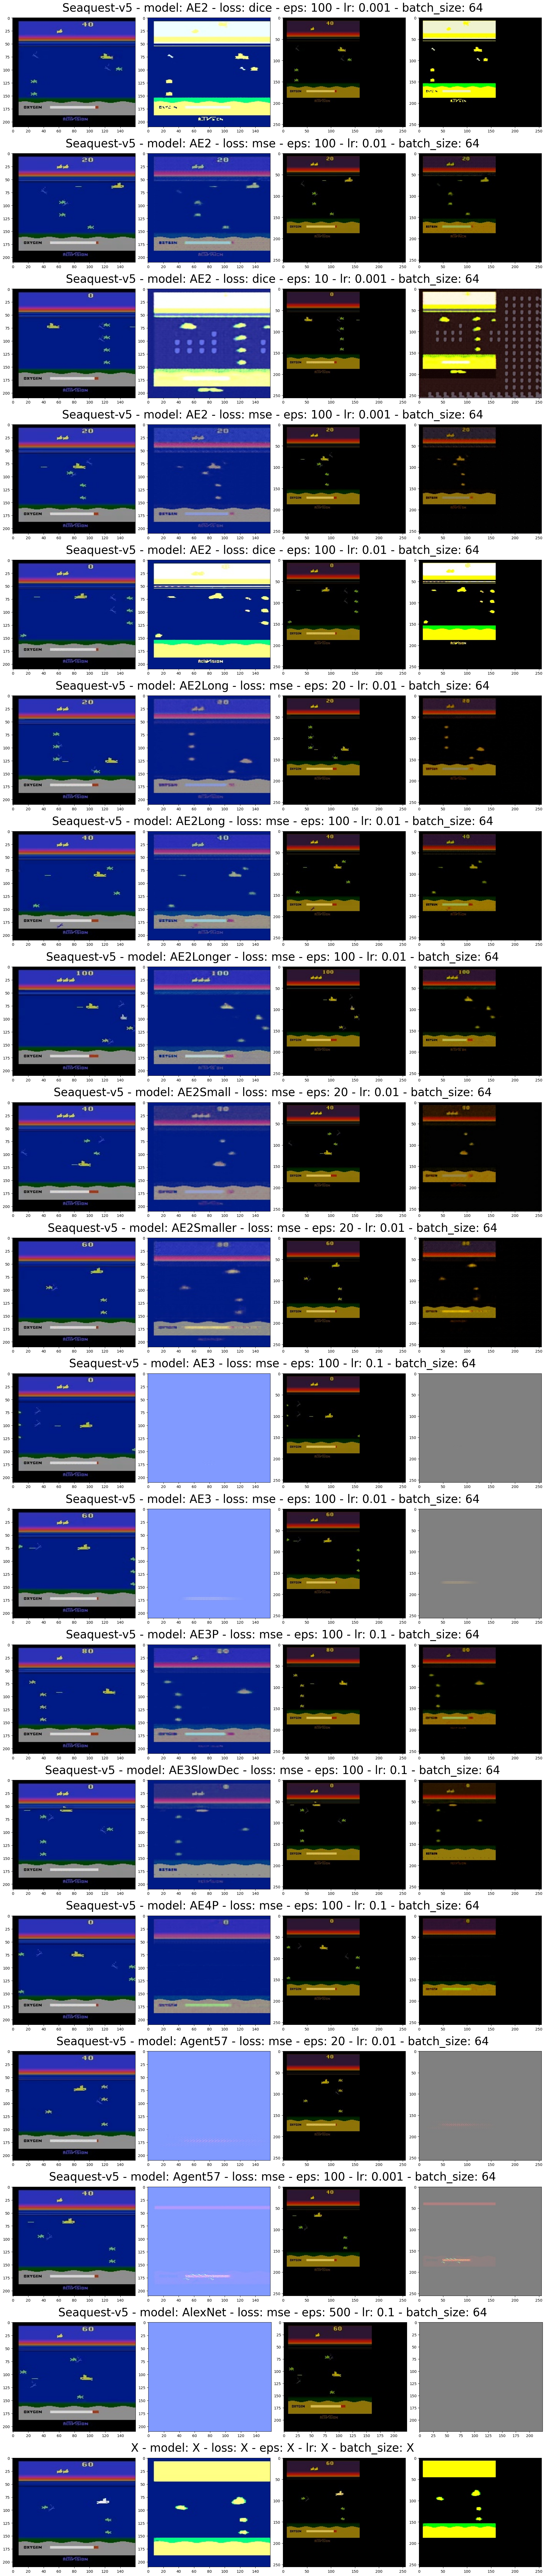

In [68]:
# Sort images by model
images = sorted(images, key=lambda x: x[4]['model'])

# create Mx1 subplots
fig, axs = plt.subplots(nrows=len(images), ncols=1, constrained_layout=True, figsize=(20, 5*len(images)))
# fig.suptitle('Figure title')

# clear subplots
for ax in axs:
    ax.remove()

    
# add subfigure per subplot
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]


for i, subfig in tqdm(enumerate(subfigs)):
    infos = images[i][4]
    
    subfig.suptitle(f'{infos["env"]} - model: {infos["model"]} - loss: {infos["loss"]} - eps: {infos["eps"]} - lr: {infos["lr"]} - batch_size: {infos["batch"]}', size=30)
    
                        
    # create 1x4 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=4)
    for j, ax in enumerate(axs):
        ax.imshow(images[i][j], aspect='auto')
    